## Importing the relevant packages


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
#from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts 
import seaborn as sns
sns.set()

## Importing the Data and Pre-processing 

In [4]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
#df_comp=df_comp.fillna(method='ffill')
df_comp=df_comp.ffill()

In [5]:
df_comp['market_value']=df_comp.ftse #ftse

In [6]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## The ACF

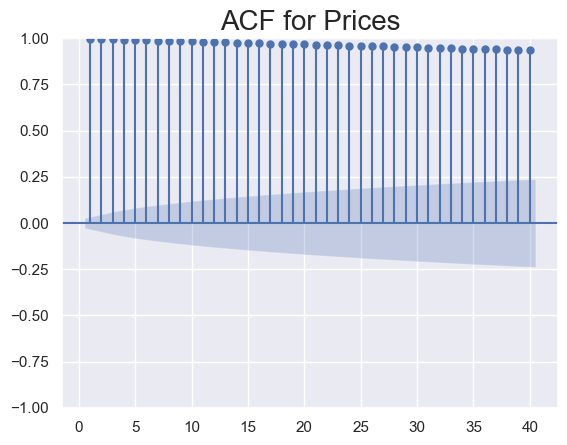

In [7]:
sgt.plot_acf(df.market_value, zero = False, lags = 40)
plt.title("ACF for Prices", size = 20)
plt.show()

## The PACF (Función de correlación parcial)

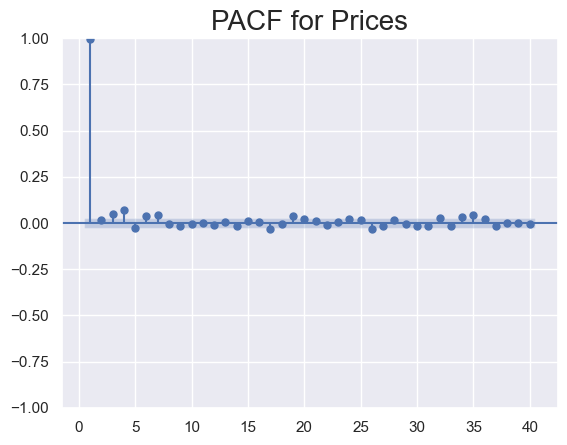

In [8]:
sgt.plot_pacf(df.market_value, lags = 40, alpha = 0.05, zero = False, method = ('ols'))
plt.title("PACF for Prices", size = 20)
plt.show()

## The AR(1) Model

In [ ]:
#model_ar = ARMA(df.market_value, order=(1,0))
# define the modelo
model_ar = ARIMA(df.market_value, order=(1, 0, 0))  # 1 numeros de valores pasados, 0 numeros de diferencias, 0 numeros de errores

In [12]:
results_ar = model_ar.fit() # ajusta el modelo

In [13]:
results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -27622.604
Date:                Sun, 29 Jun 2025   AIC                          55251.207
Time:                        01:14:51   BIC                          55270.772
Sample:                    01-07-1994   HQIC                         55258.063
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6374    423.329     12.023      0.000    4259.929    5919.346
ar.L1          0.9984      0.001   1147.578      0.000       0.997       1.000
sigma2      3511.3842     40.874     85.907      0.000    3431.272    3591.496
===================================================================================
Ljung-Box (L1) (Q):                   1.51   Jarque-Bera (JB):              3313.33
Prob(Q):                              0.22   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Higher-Lag AR Models

In [14]:
#model_ar_2 = ARMA(df.market_value, order=(2,0))
model_ar_2 = ARIMA(df.market_value, order=(2,0,0))
results_ar_2 = model_ar_2.fit()
results_ar_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -27621.949
Date:                Sun, 29 Jun 2025   AIC                          55251.898
Time:                        01:21:37   BIC                          55277.984
Sample:                    01-07-1994   HQIC                         55261.039
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    368.251     13.821      0.000    4367.881    5811.400
ar.L1          0.9811      0.010     99.868      0.000       0.962       1.000
ar.L2          0.0171      0.010      1.749      0.080      -0.002       0.036
sigma2      3510.1277     41.037     85.535      0.000    3429.696    3590.560
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3282.81
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
#model_ar_3 = ARMA(df.market_value, order=(3,0))
model_ar_3 = ARIMA(df.market_value, order=(3,0,0))
results_ar_3 = model_ar_3.fit()
results_ar_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -27615.962
Date:                Sun, 29 Jun 2025   AIC                          55241.925
Time:                        01:23:27   BIC                          55274.532
Sample:                    01-07-1994   HQIC                         55253.351
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    378.583     13.444      0.000    4347.631    5831.651
ar.L1          0.9802      0.010     99.076      0.000       0.961       1.000
ar.L2         -0.0309      0.013     -2.315      0.021      -0.057      -0.005
ar.L3          0.0489      0.009      5.383      0.000       0.031       0.067
sigma2      3502.2643     41.020     85.379      0.000    3421.866    3582.662
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):              3286.97
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
#model_ar_4 = ARMA(df.market_value, order=[4,0])
model_ar_4 = ARIMA(df.market_value, order=[4,0,0])
results_ar_4 = model_ar_4.fit()
results_ar_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -27602.680
Date:                Sun, 29 Jun 2025   AIC                          55217.359
Time:                        01:25:25   BIC                          55256.488
Sample:                    01-07-1994   HQIC                         55231.070
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    391.959     12.985      0.000    4321.416    5857.866
ar.L1          0.9767      0.010     97.788      0.000       0.957       0.996
ar.L2         -0.0287      0.013     -2.129      0.033      -0.055      -0.002
ar.L3         -0.0224      0.013     -1.784      0.074      -0.047       0.002
ar.L4          0.0728      0.009      8.033      0.000       0.055       0.091
sigma2      3484.0262     41.922     83.108      0.000    3401.861    3566.191
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              3044.18
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               1.90   Skew:                            -0.28
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Consideraremos mas los modelos con mayor valor de Log Likelihood y menores valores de AIC y BIC.

## LLR Test (Constrastamos ambos modelos)

In [20]:
def LLR_test(mod_1, mod_2, DF=1): #mod_1 y mod_2 son los modelos a comparar, DF es el numero de grados de libertad (1 para el modelo AR(1) y 2 para el modelo AR(2))
    L1 = mod_1.llf #log-likelihood del modelo 1
    L2 = mod_2.llf #log-likelihood del modelo 2
    LR = (2*(L2-L1)) #diferencia de log-likelihoods
    p = chi2.sf(LR, DF).round(3) #p-value del constraste de hipotesis, si p es menor a 0.05, se rechaza la hipotesis nula que los modelos son iguales
    return p #constraste de hipotesis, si p es menor a 0.05, se rechaza la hipotesis nula que los modelos son iguales
#chi2.sf(LR, DF).round(3) es la distribucion chi-cuadrado, LR es el estadistico de contraste, DF es el numero de grados de libertad

## Comparing Higher-Lag AR Models

In [18]:
LLR_test(results_ar_2, results_ar_3)

np.float64(0.001)

In [19]:
LLR_test(results_ar_3, results_ar_4)

np.float64(0.0)

Como podemos obserbar los modelos constrastados anteriomente son significativamente diferentes.

In [21]:
model_ar_4 = ARIMA(df.market_value, order=[4,0,0])
results_ar_4 = model_ar_4.fit()
print(results_ar_4.summary()) 
print ("LLR test: " + str(LLR_test(results_ar_3, results_ar_4)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(4, 0, 0)   Log Likelihood              -27602.680
Date:                Sun, 29 Jun 2025   AIC                          55217.359
Time:                        01:38:13   BIC                          55256.488
Sample:                    01-07-1994   HQIC                         55231.070
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    391.959     12.985      0.000    4321.416    5857.866
ar.L1          0.9767      0.010     97.788      0.000       0.957       0.996
ar.L2         -0.0287      0.013     -2.129      0.0

In [22]:
model_ar_5 = ARIMA(df.market_value, order=(5,0,0))
results_ar_5 = model_ar_5.fit()
print(results_ar_5.summary())
print("\nLLR test p-value = " + str(LLR_test(results_ar_4, results_ar_5)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(5, 0, 0)   Log Likelihood              -27600.460
Date:                Sun, 29 Jun 2025   AIC                          55214.920
Time:                        01:39:42   BIC                          55260.570
Sample:                    01-07-1994   HQIC                         55230.916
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    386.229     13.178      0.000    4332.646    5846.635
ar.L1          0.9788      0.010     97.867      0.000       0.959       0.998
ar.L2         -0.0293      0.013     -2.176      0.0

Hay que obserbar que el ultimo coeficiente sea disitnto de cero por que de ser cero estamos en el modelo anterior y no aporta nada.

In [23]:
model_ar_6 = ARIMA(df.market_value, order=(6,0,0))
results_ar_6 = model_ar_6.fit()
print(results_ar_6.summary())
print("\nLLR test p-value = " + str(LLR_test(results_ar_5, results_ar_6)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(6, 0, 0)   Log Likelihood              -27596.587
Date:                Sun, 29 Jun 2025   AIC                          55209.174
Time:                        01:41:28   BIC                          55261.345
Sample:                    01-07-1994   HQIC                         55227.455
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    396.932     12.822      0.000    4311.669    5867.612
ar.L1          0.9800      0.010     96.873      0.000       0.960       1.000
ar.L2         -0.0333      0.014     -2.438      0.0

In [25]:
model_ar_7 = ARIMA(df.market_value, order=(7,0,0))
results_ar_7 = model_ar_7.fit()
print(results_ar_7.summary())
print("\nLLR test p-value = " + str(LLR_test(results_ar_6, results_ar_7)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(7, 0, 0)   Log Likelihood              -27592.022
Date:                Sun, 29 Jun 2025   AIC                          55202.044
Time:                        01:42:46   BIC                          55260.736
Sample:                    01-07-1994   HQIC                         55222.610
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    405.380     12.555      0.000    4295.111    5884.171
ar.L1          0.9783      0.010     95.742      0.000       0.958       0.998
ar.L2         -0.0304      0.014     -2.183      0.0

In [26]:
model_ar_8 = ARIMA(df.market_value, order=(8,0,0))
results_ar_8 = model_ar_8.fit()
print(results_ar_8.summary())
print("\nLLR test p-value = " + str(LLR_test(results_ar_7, results_ar_8)))

                               SARIMAX Results                                
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(8, 0, 0)   Log Likelihood              -27591.854
Date:                Sun, 29 Jun 2025   AIC                          55203.708
Time:                        01:42:55   BIC                          55268.922
Sample:                    01-07-1994   HQIC                         55226.560
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    407.243     12.498      0.000    4291.458    5887.823
ar.L1          0.9787      0.010     95.719      0.000       0.959       0.999
ar.L2         -0.0305      0.014     -2.183      0.0

Descartamos el 8 y nos quedamos con el 7.

In [27]:
print("LLR test: " + str(LLR_test(results_ar, results_ar_7, DF = 6)))

LLR test: 0.0


## Analysing the Residuals

In [29]:
#df['res_price'] = results_ar_7.resid
df.loc[:, 'res_price'] = results_ar_7.resid

In [30]:
sts.adfuller(df.res_price) #test de raiz unitaria, si p es menor a 0.05, se rechaza la hipotesis nula que la serie es no estacionaria deke fuller, si p es mayor a 0.05, se acepta la hipotesis nula que la serie es estacionaria
#si p es mayor a 0.05, se acepta la hipotesis nula que la serie es estacionaria
#si p es menor a 0.05, se rechaza la hipotesis nula que la serie es estacionaria
#si p es menor a 0.05, se rechaza la hipotesis nula que la serie es estacionaria

(np.float64(-76.05339410789954),
 0.0,
 0,
 5020,
 {'1%': np.float64(-3.431653316130827),
  '5%': np.float64(-2.8621159253018247),
  '10%': np.float64(-2.5670765656497516)},
 np.float64(54842.15874022135))

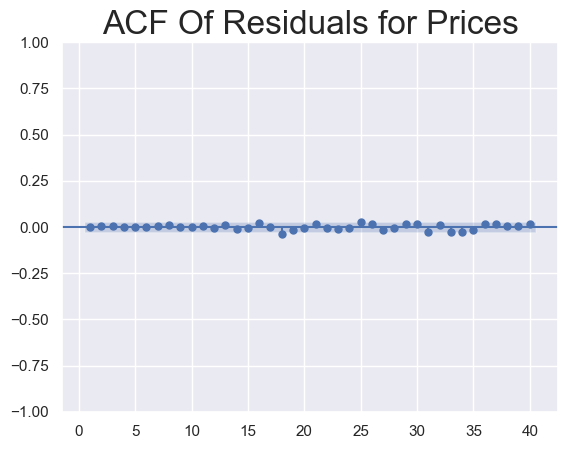

In [36]:
sgt.plot_acf(df.res_price, zero = False, lags = 40)
plt.title("ACF Of Residuals for Prices",size=24)
plt.show()

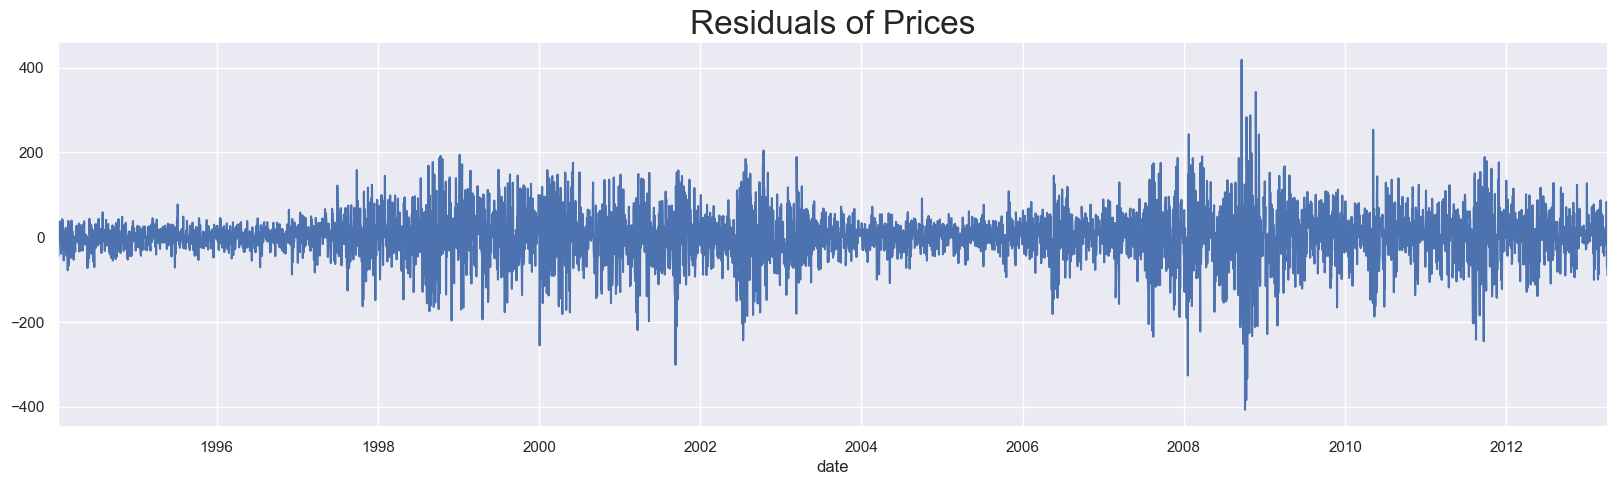

In [37]:
df.res_price[1:].plot(figsize=(20,5))
plt.title("Residuals of Prices",size=24)
plt.show()

### Tener en cuenta que los modelos AR(p) son estacionarios si los coeficientes de los terminos autorregresivos son menores a 1 en valor absoluto. Ademas no son los mas adecuados para series con tendencia o no estacionarias.